## 4-1. 로지스틱 회귀 
#### 학습목표
- 로지스틱 회귀 알고리즘을 배우고 이진 분류 문제에서 클래스 확율을 예측해본다.

## 1. 럭키백의 확률
- 럭키백이 들어갈 수 있는 생선은 7개라고 알려줌, 해당 이벤트를 잘 마치려면 럭키백에 들어간 생선의 크기, 무게 등이 주어졌을 때 7개 생선에 대한 확률을 출력하는 것이 목적이다.

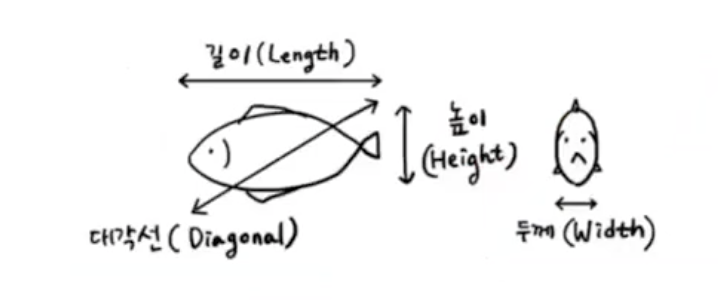

- 하지만 고민에 빠졌다. 확률은 숫자이니 회귀 문제인가? 7개의 생선에 대한 문제라면 분류 문제인가? 

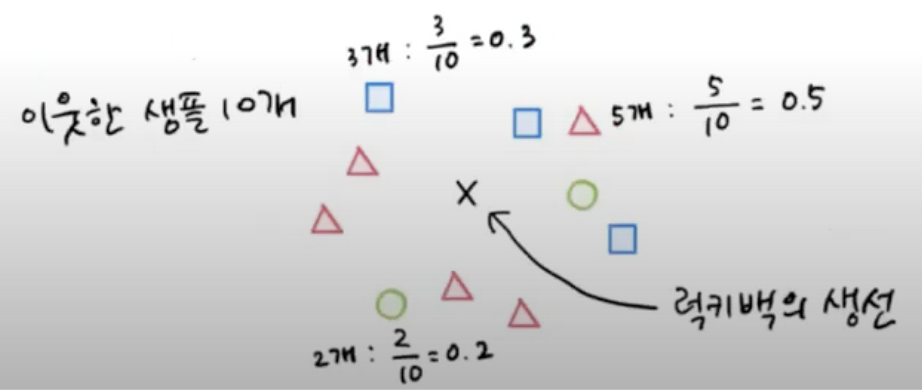

- 하지만 문득 아이디어가 떠올랐다. **"K-최근접 이웃은 주변 이웃을 찾아주니까 이웃의 클래스 비율을 확률이라고 출력하면 되지 않을까?"**
- 위 그림을 보면 샘플 **X** 주위에 가장 가까운 이웃 샘플 10개를 표시함. (사각형 3개, 삼각형 5개, 원 2개)
- 이웃한 샘플의 클래스를 확률로 삼는다면 샘플 **X**가 사각형을 확율은 30%, 삼각형일 확률은 50%, 원이 확률은 20% 이다.
- 사이킷런의 K-최근접 이웃 분류기도 이런 동일한 방식으로 클래스 확률을 계산하여 제공한다.

### 1-1 데이터 준비하기 

In [1]:
import pandas as pd
fish = pd.read_csv('https://bit.ly/fish_csv_data')
fish.head()

,Species,Weight,Length,Diagonal,Height,Width
0,Bream,242.0,25.4,30.0,11.5200,4.0200
1,Bream,290.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,26.5,31.1,12.3778,4.6961
3,Bream,363.0,29.0,33.5,12.7300,4.4555
4,Bream,430.0,29.0,34.0,12.4440,5.1340


In [2]:
# pandas unique 함수로 고유값 추출
print(pd.unique(fish['Species']))

['Bream' 'Roach' 'Whitefish' 'Parkki' 'Perch' 'Pike' 'Smelt']


- Species 열을 타깃으로 만들고 나머지 5개의 열(Weight, Length, Diagonal, Height, Width)은 입력 데이터로 사용할 예정 
- 데이터 프레임에서 열을 선택하는 방법은 원하는 열을 리스트로 나열하면 된다. (numpy를 사용해서)

In [3]:
# Speices열을 제외한 나머지 5개 열을 리스트로 나열한 입력 데이터 
fish_input = fish[['Weight', 'Length', 'Diagonal', 'Height', 'Width']].to_numpy()

In [6]:
# 확인
print(fish_input[:5])

[[242.      25.4     30.      11.52     4.02  ]
 [290.      26.3     31.2     12.48     4.3056]
 [340.      26.5     31.1     12.3778   4.6961]
 [363.      29.      33.5     12.73     4.4555]
 [430.      29.      34.      12.444    5.134 ]]


In [7]:
# 위와 동일한 방식으로 타깃 데이터 만들기 
fish_target = fish['Species'].to_numpy()

In [8]:
# 만든 데이터로 데이터 세트로 훈련 세트, 테스트 세트 나누기 
from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target = train_test_split(
   fish_input, fish_target, random_state=42)

In [9]:
# StandardScaler 클래스로 훈련 세트와 테스트 세트 표준화 전처리 
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ss.fit(train_input)
train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)

### 1-2 K-최근접 이웃 분류기의 확률 예측
- KNeighborClassifier 클래스 객체를 만들기 
- 훈련 세트로 모델을 훈련하고 훈련 세트와 테스트 세트의 점수 확인 
- 최근접 이웃 개수인 k를 3으로 지정 (n_neighbors=3)

In [11]:
# K-최근접 이웃 분류로 훈련, 평가 하기 
from sklearn.neighbors import KNeighborsClassifier
kn = KNeighborsClassifier(n_neighbors=3)
kn.fit(train_scaled, train_target)
print(kn.score(train_scaled, train_target))
print(kn.score(test_scaled, test_target))

0.8907563025210085
0.85


- 여기서는 클래스 확률을 배우는 것이 목적이므로 훈련 세트와 테스트 세트 점수는 신경쓰지 않도록 한다.
- 타깃 데이터를 만들 때 fish['Species']를 사용해 만들었기 때문에 훈련 세트와 테스트 세트의 타깃 데이터에도 7개의 생선 종류가 들어가 있다. 
- 이렇게 타깃 데이터에 2개 이상의 클래스가 포함된 문제를 **'다중 분류(multiclass classification)'** 이라고 한다.
- 하지만 chapter 2에서 만들었던 이진 분류와 모델을 만들고 훈련하는 방식은 모두 동일하다.
- 이진 분류를 사용했을 때는 양성 클래스와 음성 클래스를 각각 1과 0으로 지정하여 타깃 데이터를 만들었다. 다중 분류에서도 타깃값을 숫자로 바꾸어 입력할 수 있지만 사이킷런에서는 문자열로 된 타깃값을 그대로 사용 가능하다. 
- 하지만 주의해야할 사항이 있다. 타깃값을 그대로 사이킷런 모델에 전달하면 순서가 자동으로 알파벳 순으로 매겨진다. 따라서 pd.unique(fish['Species'])로 출력했던 순서와 다르다. (KNeighborsClassifier에서 정렬된 타깃값은 classes_ 속성에 저장되어 있음.)

In [12]:
# KNeighborsClassifier에서 정렬렬 된 타깃값 확인
print(kn.classes_)

['Bream' 'Parkki' 'Perch' 'Pike' 'Roach' 'Smelt' 'Whitefish']


In [13]:
# 테스트 세트에 있는 처음 5개 샘플의 타깃값을 예측
print(kn.predict(test_scaled[:5]))

['Perch' 'Smelt' 'Pike' 'Perch' 'Perch']


- 이 5개의 샘플에 대한 예측의 확률을 구할려면 사이킷런의 predict_proba() 메서드를 이용한다. (클래스별 확률값 반환)

In [15]:
# 테스트 세트에 있는 처음 5개의 샘풀에 대한 확률 출력 
import numpy as np
proba = kn.predict_proba(test_scaled[:5])
print(np.round(proba, decimals=4))  # round 함수를 이용하여 소수점 네번째 자리까지 표시

[[0.     0.     1.     0.     0.     0.     0.    ]
 [0.     0.     0.     0.     0.     1.     0.    ]
 [0.     0.     0.     1.     0.     0.     0.    ]
 [0.     0.     0.6667 0.     0.3333 0.     0.    ]
 [0.     0.     0.6667 0.     0.3333 0.     0.    ]]


- 확인해본 결과 predict_proba() 메서드의 출력 순서는 앞서 보았던 classes_속성과 같다.
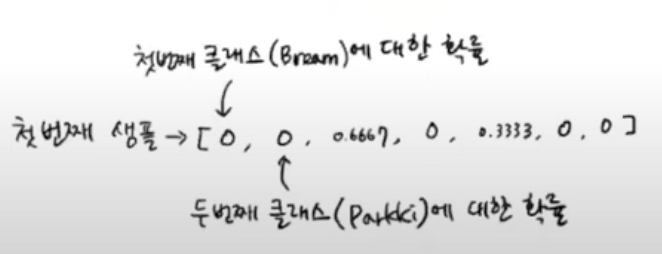

In [17]:
# 해당 모델이 계산한 확률이 가장 가까운 이웃의 비율이 맞는지 확인 
distances, indexes = kn.kneighbors(test_scaled[3:4]) # 네 번째 샘플 하나를 선택 
print(train_target[indexes])

[['Roach' 'Perch' 'Perch']]


- 이 샘플의 이웃은 다섯 번째 클래스인 'Roach'가 1개이고 세 번째 클래스인 'Perch'가 2개 이다. 따라서 다섯 번째 클래스에 대한 확률은 1/3 = 0.3333, 세 번째 클래스에 대한 확률은 2/3=0.6667이 된다.
- 아주 쉽게 클래스 확률을 예측했다. 번거로운 계산은 사이킷런이 수행해 주므로 predict_proba() 메서드를 활용하면 된다.
- 그런데 조금 이상한 점이 발견되었다. 3개의 최근접 이웃을 사용하기 때문에 가능한 확률은 0/3, 1/3, 2/3, 3/3이 전부이다. 해당 사항도 확률이라고 말하기 어려우므로 더 좋은 방법을 찾아야 한다. 

## 2. 로지스틱 회귀 
- **로지스틱 회귀(logistic regression)**는 이름은 회귀이지만 사실상 분류 모델이다. 이 알고리즘은 선형 회귀와 동일하게 선형 방정식을 학습한다.
- $z = a \times (Weight) + b \times (Length) + c \times (Diagonal) + d \times (Height) + e \times (Width) + f$
- 여기서 a, b, c, d, e는 가중치 혹은 계수이다. 특성은 늘어났지만 chapter 3에서 다룬 다중 회귀를 위한 선형 방정식과 같다.
- z는 어떤 값도 가능하지만 확률이 되려면 0-1(또는 0-100%) 사이 값이 되어야 한다. 
- z가 아주 큰 음수일 때 0이 되고, z가 아주 큰 양수일 때 1이 되도록 바꾸기 위해 **'시그모이드 함수(sifmoid function) 혹은 로지스틱 함수(logistic function)'**을 사용한다.

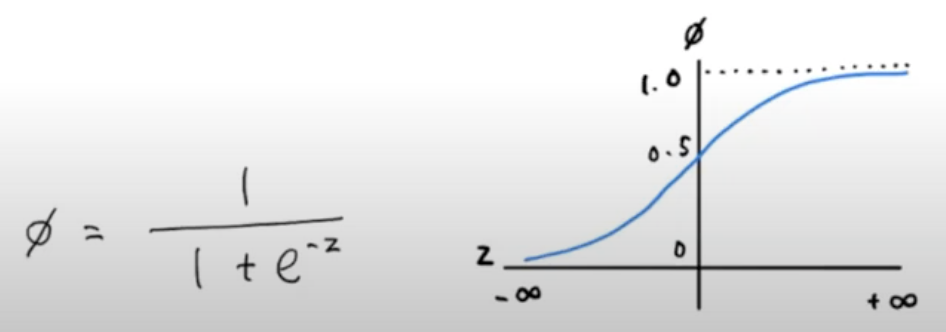

- 위 그림 왼쪽의 식이 시그모이드 함수이다. 선형 방정식의 출력 z의 음수를 사용해 자연 상수 e를 거듭제곱 하고 1을 더한 값의 역수를 취한다. (이렇게 복잡하게 계산한 이유는 오른쪽과 같은 그래프를 만들수 있기 때문이다.)
- z가 무한하게 큰 음수일 경우 이 함수는 0에 가까워지고, z가 무한하게 큰 양수가 될 때는 1에 가까워진다. z가 0이 될 때는 0.5가 된다. z가 어떤 값이 되더라도 절대로 0-1 사이의 범위를 벗어날 수없다. (0-1 -> 0%-100%)

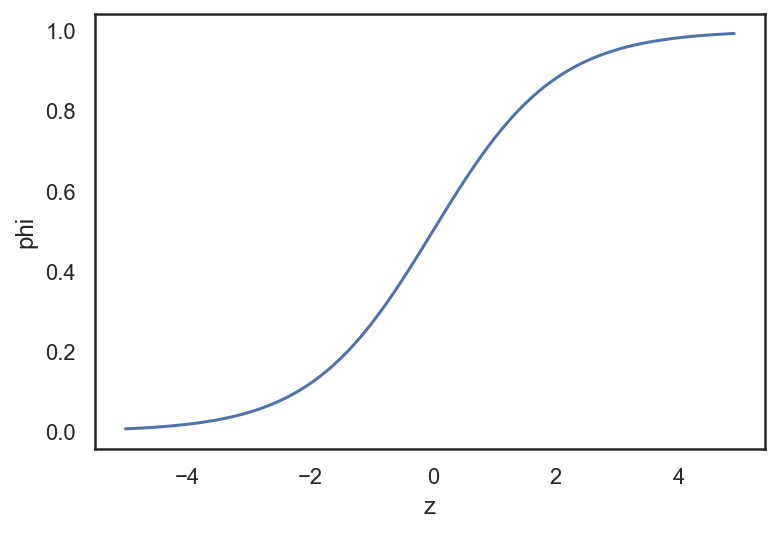

In [24]:
# 시그모이드 그래프 그리기 
import numpy as np
import matplotlib.pyplot as plt
z = np.arange(-5, 5, 0.1)
phi = 1 / (1 + np.exp(-z)) # 지수 함수 계산은 np.exp()
plt.plot(z, phi)  
plt.xlabel('z')
plt.ylabel('phi')
plt.show()

- 시그모이드 함수의 출력은 0에서 1까지 변한다. 
- 사이킷런에는 로지스틱 회귀 모델인 LogisticRegression 클래스가 준비되어 있다.
- 훈련하기 전 간단한 이진 분류를 수행하고자 한다. 이진 분류일 경우 시그모이드 함수의 출력이 0.5보다 크면 양성 클래스, 0.5보다 작으면 음성 클래스로 판단한다. 만약 정확히 0.5일 경우 라이브러리마다 다를 수 있지만 사이킷런에서는 음성 클래스로 판단한다. 

### 2-1 로지스틱 회귀로 이진 분류 수행하기 
- 넘파이 배열은 True, False 값을 전달하여 행을 선택할 수 있다. 이를 **블리언 인덱싱(boolean indexing)**이라고 한다.

In [29]:
# 간단한 예시
char_arr = np.array(['A', 'B', 'C', 'D', 'E'])
print(char_arr[[True, False, True, False, False]])

['A' 'C']


- 위와 같이 'A'에서 'E'까지 5개의 원소로 이루어진 배열이 있다. 여기서 'A'와 'C'만 골라내려면 첫 번째와 세 번째 원소만 True이고 나머지 원소는 모두 False인 배열을 전달한다.
- 이와 같은 방식을 사용해 훈련 세트에 도미(Bream)와 빙어(Smelt)의 행만 골라보고자 한다. 
- 비교 연산자를 이용하여 도미와 빙어의 행을 모두 True로 만들 수 있다. 예를 들어 도미인 행을 골라내려면 train_target == 'Bream'과 같이 쓴다. 해당 비교식은 train_target 배열에서 'Bream'인 것은 True이고 그 외는 모두 False인 배열을 반환한다. 
- 도미와 빙어에 대한 비교 결과를 비트 OR 연산자(|)를 사용해 합치면 도미와 빙어에 대한 행만 골라낼 수 있다.

In [30]:
# 블리언 인덱싱으로 도미와 빙어 행만 골라내기 
bream_smelt_indexes = (train_target == 'Bream') | (train_target == 'Smelt')
train_bream_smelt = train_scaled[bream_smelt_indexes]
target_bream_smelt = train_target[bream_smelt_indexes]

- bream_smelt_indexes 배열은 도미와 빙어일 경우 True이고 그 외는 모두 False 값이 들어가 있다. 따라서 이 배열을 사용해 train_scaled와 train_target 배열에 불리언 인덱싱을 적용하면 손쉽게 도미와 빙어 데이터만 골라낼 수있다. 

In [33]:
# 로지스틱 회귀 모델을 훈련 하기 
from sklearn.linear_model import LogisticRegression

# 로지스틱 회귀 모델 선언 
lr = LogisticRegression()

# 훈련 
lr.fit(train_bream_smelt, target_bream_smelt)

LogisticRegression()

In [34]:
# 훈련한 모델을 이용하여 train_bream_smelt에 있는 처음 5개 샘플을 예측하기 
print(lr.predict(train_bream_smelt[:5]))

['Bream' 'Smelt' 'Bream' 'Bream' 'Bream']


- 두 번째 샘플을 제외하고 모두 도미로 예측

In [35]:
# predict_proba() 메서드로 train_bream_smelt 확률 출력
print(lr.predict_proba(train_bream_smelt[:5]))

[[0.99759855 0.00240145]
 [0.02735183 0.97264817]
 [0.99486072 0.00513928]
 [0.98584202 0.01415798]
 [0.99767269 0.00232731]]


- 샘플마다 2개의 확률이 출력되었다. 첫 번째 열이 음성 클래스(0)에 대한 확률, 두 번째 열이 양성 클래스(1)에 대한 확률이다.

In [36]:
# 양성 클래스 확인
print(lr.classes_)

['Bream' 'Smelt']


- Bream과 Smelt 중에서 어떤 것이 양성 클래스일까? classes_ 속성으로 확인한 결과 Bream 즉 빙어가 양성 클래스로 나왔다.
- predict_proba() 메서드가 반환한 배열 값을 보면 두 번째 샘플만 양성 클래스인 빙어의 확률이 높다. 나머지는 모두 도미로 예측 한다.
- 결론적으로 로지스틱 회귀로 성공적인 이진 분류를 수행했다. 그럼 로지스틱 회귀가 학습한 계수를 확인해보자 

In [37]:
# 로지스틱 회귀가 학습한 계수 확인
print(lr.coef_, lr.intercept_)

[[-0.4037798  -0.57620209 -0.66280298 -1.01290277 -0.73168947]] [-2.16155132]


- 따라서 이 로지스틱 회귀 모델이 학습한 방정식은 아래와 같다.
- $z = -0.404 \times (Weight) - 0.576 \times (Length) - 0.663 \times (Diagonal) - 1.013 \times (Height) - 0.732 \times (Width) - 2.161$
- 확실히 로지스틱 회귀는 선형 회귀와 매우 비슷하다. 그리고 decision_function()를 이용해서 z값을 출력할 수 있다.

In [38]:
# train_bream_smelt의 처음 5개의 샘플의 z값을 출력 
decisions = lr.decision_function(train_bream_smelt[:5])
print(decisions)

[-6.02927744  3.57123907 -5.26568906 -4.24321775 -6.0607117 ]


- 해당 z 값을 시그모이드 함수에 통과시키면 확률을 얻을 수 있다.
- scipy 라이브러리의 시그모이드 함수 중 expit를 이용한다.

In [39]:
# scipy를 이용해서 시그모이드 함수로 확률 구하기 
from scipy.special import expit
print(expit(decisions))

[0.00240145 0.97264817 0.00513928 0.01415798 0.00232731]


- 출력 결과 predict_proba() 메서드 출력의 두 번째 열의 값과 동일하다. 즉 decision_function() 메서드는 양성 클래스에 대한 z 값을 반환한다.
- 정리 
    - 이진 분류를 위해 2개의 생선 샘플을 골라냈고 이를 사용해 로지스틱 회귀 모델을 훈련했다.
    - 이진 분류일 경우 predict_proba() 메서드는 음성 클래스와 양성 클래스에 대한 확률을 출력한다.
    - decision_function() 메서드는 양성 클래스에 대한 z 값을 계산한다.
    - coef_ 속성과 intercept_ 속성에는 로지스틱 모델이 학습한 선형 방정식의 계수(기울기)가 들어있다.

### 2-2 로지스틱 회귀로 다중 분류 수행하기 
- 앞에서 이진 분류를 위해 로지스틱 회귀 모델을 훈련시켜 보았다. 다중 분류도 다르지 않다. 
- LogisticRegression 클래스는 기본적으로 반복적인 알고리즘을 사용한다. max_iter 매개변수에서 반복 회수를 지정하며 기본값은 100이다.
- LogisticRegression은 기본적으로 릿지 회귀와 같이 계숙의 제곱을 규제한다. 이런 구제를 **L2 규제**라고 부른다. 
- 앞에 릿지 회귀에서는 alpha 매개변수로 규제의 양을 조절했다. (alpha가 커지면 규제도 커진다.) LogisticRegression에서 규제를 제어하는 매개변수는 C 이다.
- 하지만 C는 alpha와 반대로 작을수록 규제가 커진다. C의 기본값은 1이다.

In [40]:
# 7개의 생선 데이터로 LogisticRegression를 사용하여 다중 분류 모델 훈련하고 평가하기 

# 선언 - 반복 횟수가 부족하여, max_iter를 1000으로 규제를 완화히기 위해 C를 20으로 설정 
lr = LogisticRegression(C=20, max_iter=1000)

# 훈련
lr.fit(train_scaled, train_target)

# 평가 - 분류문제이기 때문에 정확도
print(lr.score(train_scaled, train_target))
print(lr.score(test_scaled, test_target))

0.9327731092436975
0.925


- 모델 훈련 평가 결과 훈련 세트와 테스트 세트에 대한 점수가 높고 과대적합이나 과소적합으로 치우치지는 않아 보인다.

In [41]:
# 테스트 세트의 처음 5개 샘플에 대한 예측
print(lr.predict(test_scaled[:5]))

['Perch' 'Smelt' 'Pike' 'Roach' 'Perch']


In [44]:
# 5개 샘플에 대한 예측 확률 출력 
proba = lr.predict_proba(test_scaled[:5])
print(np.round(proba, decimals=3))

[[0.    0.014 0.841 0.    0.136 0.007 0.003]
 [0.    0.003 0.044 0.    0.007 0.946 0.   ]
 [0.    0.    0.034 0.935 0.015 0.016 0.   ]
 [0.011 0.034 0.306 0.007 0.567 0.    0.076]
 [0.    0.    0.904 0.002 0.089 0.002 0.001]]


- 5개 샘플에대한 예측이므로 5개의 행이 출력, 7개 생선에 대한 확률을 계산하였으므로 7개의 열이 출력 되었다.
- 첫 번째 샘플을 보면 세 번째 열의 확률이 0.841, 즉 84.1%로 가장 높다. 세 번째 열이 어떤 생선에 대한 확률일까?

In [45]:
# 클래스 정보 확인
print(lr.classes_)

['Bream' 'Parkki' 'Perch' 'Pike' 'Roach' 'Smelt' 'Whitefish']


- 모두 확인 결과 세 번째는 Perch(농어)에 대한 확률로 나왔다. 두 번째 샘플은 여섯 번째 열인 Smelt(빙어)를 가장 높은 확률로 예측하였다.
- 다중 분류는 샘플마다 클래스 개수만큼 확률을 출력한다. 위의 예제는 7개이며 이 중에 가장 높은 확률이 예측 클래스가 된다.

In [46]:
# 기울기와 점선을 통해 선형 방정식의 모양 알아내기 
print(lr.coef_.shape, lr.intercept_.shape)

(7, 5) (7,)


- 이 데이터는 5개의 특성을 사용하므로 coef_ 배열의 열은 5개, 행은 7개 이고, intercept_도 행이 7개나 있다. 이 말은 이진 분류에서 보았던 z를 7개나 계산한다는 의미, 즉 다중 분류는 클래스마다 z 값을 하나씩 계산한다는 의미이다. 그래서 가장 높은 z 값을 출력하는 클래스가 예측 클래스가 된다.
- 그리고 이진 분류에서는 시그모이드 함수를 사용해 z를 0과 1 사이의 값으로 반환 했다. 다중 분류는 이와 달리 **소프트맥스 함수(softmax function)**를 사용하여 7개의 값을 확률로 변환한다. <소프트맥스 함수란 여려 개의 선형 방정식의 출력값을 0-1 사이로 압축하고 전체 합이 1이 되도록 만든다. 이를 위해 지수 함수를 사용하기 때문에 **정규화된 지수 함수**라고도 부른다.>
- 소프트맥스 계산 방식은 먼저 7개의 z 값의 이름을 $z1$에서 $z7$이라고 붙인다. $z1$에서 $z7$까지 값을 사용해 지수 함수 $e^{z1}$ - $e^{z7}$을 계산해 모두 더한다. 이를 $e.sum$이라고 하겠다.
- 계산식은 $e.sum=e^{z1}+ e^{z2}+e^{z3}+e^{z4}+e^{z5}+e^{z6}+e^{z7}$
- 그런 다음 $e^{z1}$ - $e^{z7}$을 각각 $e.sum$으로 나누어 주면 된다.
- 계산식은 $s1=\frac{e^{z1}}{e.sum}$, $s2=\frac{e^{z2}}{e.sum}$, ..., $s7=\frac{e^{z7}}{e.sum}$
- 이렇게 계산하면 분자와 분모가 같아지므로 1이 된다.

In [47]:
# decision_function() 메서드로 5개 샘플에 대한 z1 ~ z7의 값을 구해보기 
decision = lr.decision_function(test_scaled[:5])
print(np.round(decision, decimals=2))

[[ -6.5    1.03   5.16  -2.73   3.34   0.33  -0.63]
 [-10.86   1.93   4.77  -2.4    2.98   7.84  -4.26]
 [ -4.34  -6.23   3.17   6.49   2.36   2.42  -3.87]
 [ -0.68   0.45   2.65  -1.19   3.26  -5.75   1.26]
 [ -6.4   -1.99   5.82  -0.11   3.5   -0.11  -0.71]]


In [48]:
# scipy.special의 softmax() 사용 
from scipy.special import softmax

proba = softmax(decision, axis=1) # axis 매개변수는 소프트백스를 계산할 축을 지정 axis=1로 지정하여 각 행에 대해 소프트맥스 계산
print(np.round(proba, decimals=3))

[[0.    0.014 0.841 0.    0.136 0.007 0.003]
 [0.    0.003 0.044 0.    0.007 0.946 0.   ]
 [0.    0.    0.034 0.935 0.015 0.016 0.   ]
 [0.011 0.034 0.306 0.007 0.567 0.    0.076]
 [0.    0.    0.904 0.002 0.089 0.002 0.001]]


- 출력 결과 앞서 구한 proba 배열과 정확히 일치한다. 다중 분류도 성공이다.
- 로지스틱 회귀를 이용해서 7개의 생선에 대한 확률을 예측하는 모델을 훈련하였다.

## 문제 해결 과정 및 결론 
- 문제 해결 과정 및 정리 
    - 이번 공부는 럭키백에 담긴 생선이 어떤 생선인지 확률을 예측하는 것이었다.
    - K-최근접 이웃 모델의 확률을 출력할 수 있지만 이웃한 샘플의 클래스 비율이므로 항상 정해진 확률만 출력한다.
    - 이를 위해 가장 대표적인 분류 알고리즘 중 하나인 로지스틱 회귀를 사용하였다. 로지스틱 회귀는 회귀 모델이 아닌 분류 모델이다.
    - 로지스틱 회귀는 선형 회귀 처럼 선형 방정식을 사용하지만 선형 회귀처럼 계산한 값을 그대로 출력하는 것이 아니라, 0 - 1 사이로 압축을 한다.
    - 로지스틱 회귀 이진 분류에서는 하나의 선형 방정식을 훈련한다. 이 방정식의 출력값을 **시그모이드 함수**에 통과시켜 0 - 1 사이의 값을 만든다. 이 값이 양성 클래스에 대한 확률이다. 음성 클래스의 확률은 1에서 양성 클래스의 확률을 빼면 된다. 
    - 다중 분류일 경우 클래스 개수만큼 방정식을 훈련한다. 그다음 각 방정식의 출력밧을 **소프트맥스 함수**를  통과시켜 전체 클래스에 대한 합이 항상 1이 되도록 만든다. 이 값을 각 클래스에 대한 확률로 이해할 수 있다.